In [22]:
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from skimage.segmentation import mark_boundaries
import numpy as np
import os

In [23]:
inet_model = InceptionV3()

In [24]:
def predict_fn(images):
    predictions = inet_model.predict(images)
    return predictions

In [25]:
explainer = lime_image.LimeImageExplainer()

In [43]:
image_paths = ['Images/newfoundland_126.jpg' ]

In [44]:
output_dir = 'heatmaps'
os.makedirs(output_dir, exist_ok=True)

In [45]:
explanations = []
heatmaps = []

In [46]:
for img_path in image_paths:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(299, 299))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

In [ ]:
explanation = explainer.explain_instance(img[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

In [2]:
from PIL import Image

In [ ]:
img = Image.open('grayscale_image.jpg')
img = img.resize((299, 299))
img = np.array(img)

In [11]:
import numpy as np
from PIL import Image

In [12]:
img = Image.open('grayscale_image.jpg')

In [13]:
img_array = np.array(img)

In [14]:
if len(img_array.shape) == 2:
    print("This is a 2D grayscale image.")
elif len(img_array.shape) == 3 and img_array.shape[2] == 3:
    print("This is a 3D RGB color image.")
else:
    print("This image does not have a recognized format.")

This is a 2D grayscale image.


In [15]:
import cv2

In [19]:
image = cv2.imread('Images/samoyed_153.jpg')

In [20]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [21]:
cv2.imwrite('grayscale_image3.jpg', grayscale_image)
#cv2.imshow('Grayscale Image', grayscale_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

True

In [47]:
explanation = explainer.explain_instance(
        img[0],  # Image to explain
        predict_fn,  # Prediction function
        top_labels=5,  # Number of top labels to explain
        hide_color=0,  # Superpixel color (0 means hide)
        num_samples=1000)  #

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 610ms/step


In [56]:
from skimage.segmentation import mark_boundaries

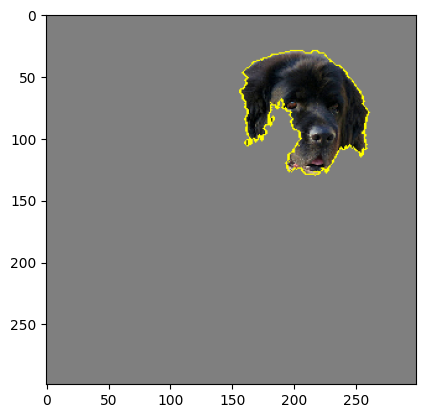

In [57]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

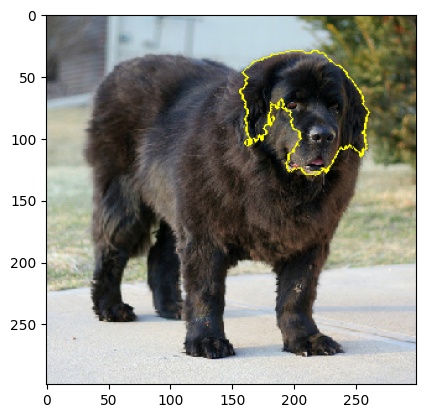

In [58]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

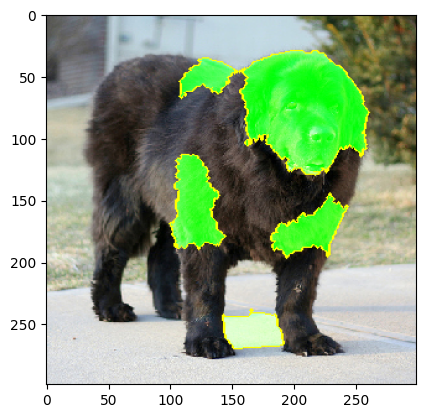

In [59]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

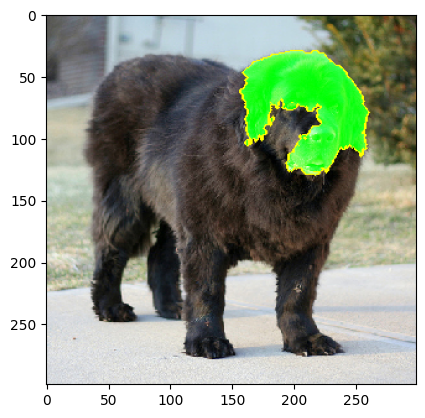

In [60]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=1000, hide_rest=False, min_weight=0.1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

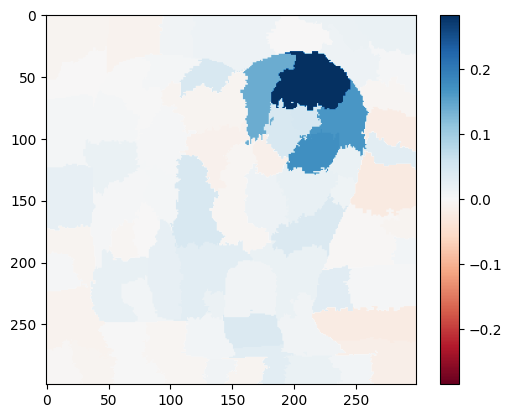

In [61]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

In [48]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

In [ ]:
heatmap_path = os.path.join(output_dir, f'{os.path.splitext(os.path.basename(img_path))[0]}_heatmap.png')
plt.imshow(heatmap_path, mark_boundaries(temp / 2 + 0.5, mask))

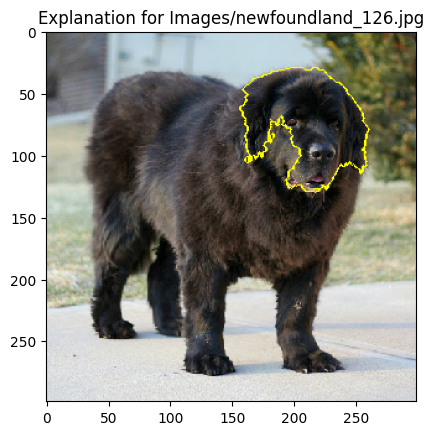

In [50]:
plt.figure()
plt.title(f'Explanation for {img_path}')
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()

In [51]:
explanations.append(explanation)
heatmaps.append((temp, mask))

In [52]:
for i, img_path in enumerate(image_paths):
    plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Original Image')

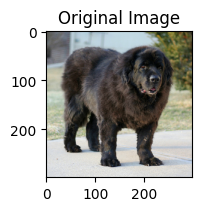

In [53]:
plt.subplot(1, 3, 1)
img = image.load_img(img_path, target_size=(299, 299))
plt.imshow(img)
plt.title('Original Image')

Text(0.5, 1.0, 'Explanation')

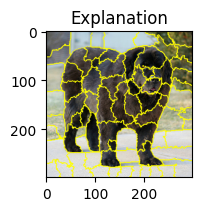

In [54]:
plt.subplot(1, 3, 2)
explanation = explanations[i]
explanation_image = mark_boundaries(explanation.image / 2 + 0.5, explanation.segments)
plt.imshow(explanation_image)
plt.title('Explanation')

SHAP METHOD

In [79]:
import shap
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from keras.preprocessing import image

In [80]:
inet_model = InceptionV3()

In [81]:
def predict_fn(images):
    images = preprocess_input(images.copy())
    predictions = inet_model.predict(images)
    return predictions

In [82]:
img_path = 'Images/newfoundland_126.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(299, 299))
img = image.img_to_array(img)
img = preprocess_input(img)
img = np.expand_dims(img, axis=0)

In [83]:
explainer = shap.Explainer(predict_fn, img)

In [ ]:
print(img)

In [ ]:
shap_values = explainer.shap_values(img)

In [ ]:
print(img) 

In [ ]:
shap.summary_plot(shap_values, img, class_names=decode_predictions(np.arange(1000))[0][0][1])